In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import ast

#Loading the dataset
print("Loading the Dataset...")
dataset = load_dataset("lukebarousse/data_jobs")
print("Dataset Loaded Successfully...")

#converting dataset to a data frame
df = dataset["train"].to_pandas()
print("Data Frame Created...")

############ Cleaning
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.drop(["salary_hour_avg"], axis=1, inplace=True)
df = df[df["job_title_short"].notna()]
df = df[df["salary_year_avg"].notna()]
df["joining_month"] = df["job_posted_date"].dt.month

def str_to_list(str_list):
    if pd.notna(str_list):
        return ast.literal_eval(str_list)
    else:
        return str_list

df["job_skills"] = df["job_skills"].apply(str_to_list)

print("Data Cleaned...")

c:\Users\ADMIN\anaconda3\envs\pandas_prac_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the Dataset...
Dataset Loaded Successfully...
Data Frame Created...
Data Cleaned...


In [3]:
df_exploded = df.explode("job_skills").copy()
df_exploded

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,company_name,job_skills,job_type_skills,joining_month
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,Netskope,gdpr,"{'analyst_tools': ['excel'], 'libraries': ['gd...",8
28,Data Scientist,CRM Data Specialist,"San José Province, San José, Costa Rica",via Ai-Jobs.net,Full-time,False,Costa Rica,2023-08-01 13:37:57,False,False,Costa Rica,year,109500.0,Netskope,excel,"{'analyst_tools': ['excel'], 'libraries': ['gd...",8
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,Intelletec,mongodb,"{'analyst_tools': ['tableau'], 'cloud': ['orac...",6
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,Intelletec,mongodb,"{'analyst_tools': ['tableau'], 'cloud': ['orac...",6
77,Data Engineer,Data Engineer,"Arlington, VA",via LinkedIn,Full-time,False,Sudan,2023-06-26 14:22:54,False,False,Sudan,year,140000.0,Intelletec,python,"{'analyst_tools': ['tableau'], 'cloud': ['orac...",6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,Bosch Group,airflow,"{'libraries': ['hadoop', 'spark', 'airflow'], ...",3
785682,Data Scientist,Data Scientist für datengetriebene Entwicklung...,"Reutlingen, Germany",via Ai-Jobs.net,Full-time,False,Germany,2023-03-04 06:16:08,False,False,Germany,year,157500.0,Bosch Group,kubernetes,"{'libraries': ['hadoop', 'spark', 'airflow'], ...",3
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,Tenet3,python,"{'programming': ['python', 'matlab', 'r']}",4
785692,Data Scientist,Data Scientist- Hybrid Work Location,"Dayton, OH",via Ai-Jobs.net,Full-time,False,"Illinois, United States",2023-04-21 06:02:31,False,True,United States,year,157500.0,Tenet3,matlab,"{'programming': ['python', 'matlab', 'r']}",4


In [4]:
skills_job_df = df_exploded.pivot_table(index="job_skills", columns="job_title_short", aggfunc="size")
skills_job_df

job_title_short,Business Analyst,Cloud Engineer,Data Analyst,Data Engineer,Data Scientist,Machine Learning Engineer,Senior Data Analyst,Senior Data Engineer,Senior Data Scientist,Software Engineer
job_skills,,,,,,,,,,
airflow,6.0,6.0,72.0,731.0,141.0,55.0,29.0,338.0,96.0,23.0
airtable,NaN,NaN,6.0,3.0,7.0,2.0,NaN,1.0,3.0,NaN
alteryx,16.0,NaN,124.0,79.0,77.0,3.0,53.0,13.0,20.0,1.0
angular,NaN,NaN,12.0,43.0,16.0,3.0,4.0,12.0,4.0,19.0
angular.js,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
workfront,NaN,NaN,3.0,1.0,NaN,NaN,3.0,NaN,NaN,1.0
wrike,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
xamarin,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
job_role = "Cloud Engineer"
specific_job_role_df = skills_job_df.loc[:, job_role]
# The above code will give us a series.. We can convert a series to a DF by resetting its index as shown below
specific_job_role_df = specific_job_role_df.reset_index()
specific_job_role_df

,job_skills,Cloud Engineer
0,airflow,6.0
1,airtable,NaN
2,alteryx,NaN
3,angular,NaN
4,angular.js,NaN
...,...,...
214,workfront,NaN
215,wrike,NaN
216,xamarin,NaN
217,yarn,NaN


Text(0.5, 1.0, 'Trending Skills for Cloud Engineer ')

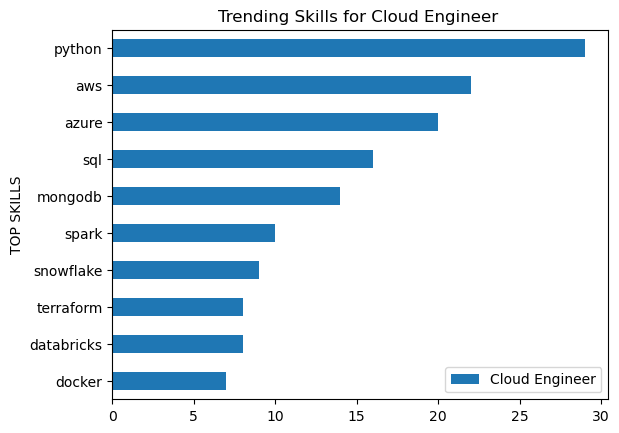

In [6]:
# Lets clean it up a bit and remove any rows where the column value is NaN
specific_job_role_df.dropna(subset=[job_role], inplace=True)
specific_job_role_df.sort_values(by=job_role, inplace=True, ascending=True)
specific_job_role_df.tail(10).plot(kind="barh", x="job_skills", y=job_role)
plt.ylabel("TOP SKILLS")
plt.title(f"Trending Skills for {job_role} ")